In [12]:
### ignore warning 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import numpy as np
import pandas as pd
import re
import glob
import spacy 
import nltk
import os
import nltk
from nltk.tokenize import TreebankWordTokenizer ,word_tokenize
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import everygrams
from nltk.tokenize.treebank import TreebankWordDetokenizer
#from nltk.tokenize.treebank import TreebankWordDetokenizer
# TreebankWordDetokenizer().detokenize(['the', 'quick', 'brown'])
# nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk import everygrams

# display  max row 
#pd.set_option("display.max_rows", None)
import ast
import tensorflow as tf
## tqdm 
from tqdm._tqdm_notebook import tqdm_notebook,tqdm
tqdm_notebook.pandas()

[nltk_data] Downloading package punkt to /home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Related Product 


In [2]:
path = '/home/nick/DITP/trade-midas/ditp3_run_test/share_between_models'
path2 = '/home/nick/DITP/trade-midas/ditp3_run_test/GNA/corpus'
# relate product  
relate_product = pd.read_csv(f'{path2}/related_product_corpus.csv')
relate_key = relate_product['keyword'].to_list()

# competitor 
comp  =  pd.read_csv(f'{path}/competitors.csv', index_col= False)

# partner
partner =  pd.read_csv(f'{path}/partners.csv' , index_col = False)

### location 

location   =  pd.read_csv(f'{path2}/country_corpus.csv', index_col = False)


### country  iso  3 

country_iso3 = pd.read_csv(f'{path}/country_iso3.csv', index_col = False)


## country wikipedia

country_wiki =  pd.read_csv(f'{path}/wikipedia_country_mapping.csv', index_col = False)
country_wiki.rename(columns={'official_name':'country','Alpha-3 code':'iso3','key_word':'keyword'},inplace=True)
country_wiki = country_wiki[['keyword','country','iso3']]


## partner 
partner =  pd.read_csv(f'{path}/partners.csv', index_col= False)

# competitor 
competiors  =  pd.read_csv(f'{path}/competitors.csv', index_col=False)

In [3]:
country_wiki

,keyword,country,iso3
0,Republic of Abkhazia,Abkhazia,NaN
1,Aphsny Axwynthkharra,Abkhazia,NaN
2,Respublika Abkhaziya,Abkhazia,NaN
3,Autonomous Republic of Abkhazia,Abkhazia,NaN
4,Islamic Republic of Afghanistan,Afghanistan,AFG
...,...,...,...
1201,Northern Rhodesia,Zambia,ZMB
1202,Republic of Zimbabwe,Zimbabwe,ZWE
1203,Rhodesia,Zimbabwe,ZWE
1204,Republic of Rhodesia,Zimbabwe,ZWE


In [4]:
location.drop(columns='Unnamed: 0',errors='ignore',inplace=True)
location

,keyword,country,iso3
0,Guangdong,China,CHN
1,Fujian,China,CHN
2,Inner Mongolia,China,CHN
3,Shaanxi,China,CHN
4,Liaoning,China,CHN
...,...,...,...
10786,Québec,NaN,Unknown code
10787,Nouveau-Brunswick,NaN,Unknown code
10788,Territoires du Nord-Ouest,NaN,Unknown code
10789,Nouvelle-Écosse,NaN,Unknown code


In [5]:
country_wiki

,keyword,country,iso3
0,Republic of Abkhazia,Abkhazia,NaN
1,Aphsny Axwynthkharra,Abkhazia,NaN
2,Respublika Abkhaziya,Abkhazia,NaN
3,Autonomous Republic of Abkhazia,Abkhazia,NaN
4,Islamic Republic of Afghanistan,Afghanistan,AFG
...,...,...,...
1201,Northern Rhodesia,Zambia,ZMB
1202,Republic of Zimbabwe,Zimbabwe,ZWE
1203,Rhodesia,Zimbabwe,ZWE
1204,Republic of Rhodesia,Zimbabwe,ZWE


In [6]:
country_all = pd.concat([location,country_wiki])
country_all.shape

(11997, 3)

In [7]:
#location  

In [8]:
country_all

,keyword,country,iso3
0,Guangdong,China,CHN
1,Fujian,China,CHN
2,Inner Mongolia,China,CHN
3,Shaanxi,China,CHN
4,Liaoning,China,CHN
...,...,...,...
1201,Northern Rhodesia,Zambia,ZMB
1202,Republic of Zimbabwe,Zimbabwe,ZWE
1203,Rhodesia,Zimbabwe,ZWE
1204,Republic of Rhodesia,Zimbabwe,ZWE


In [9]:
country_all[country_all['country'].isnull()]

,keyword,country,iso3
4807,Tokyo,NaN,Unknown code
4808,Kasai,NaN,Unknown code
4809,Chumphon,NaN,Unknown code
4810,Phang Nga,NaN,Unknown code
4811,Ranong,NaN,Unknown code
...,...,...,...
10786,Québec,NaN,Unknown code
10787,Nouveau-Brunswick,NaN,Unknown code
10788,Territoires du Nord-Ouest,NaN,Unknown code
10789,Nouvelle-Écosse,NaN,Unknown code


In [13]:
! pip install transformers

# sentiment  

In [20]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
import torch
# # find tuning model  sentiment 
# # Create class for data preparation
# class SimpleDataset:
#     def __init__(self, tokenized_texts):
#         self.tokenized_texts = tokenized_texts
    
#     def __len__(self):
#         return len(self.tokenized_texts["input_ids"])
    
#     def __getitem__(self, idx):
#         return {k: v[idx] for k, v in self.tokenized_texts.items()}

# # Load tokenizer and model, create trainer
# model_name = "ahmedrachid/FinancialBERT-Sentiment-Analysis"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# trainer = Trainer(model=model)
 






In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [21]:
pred_texts = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.']
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [22]:
predictions = trainer.predict(pred_dataset)

NameError: name 'trainer' is not defined

In [19]:


model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

sentences = ["Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales.",  
             "Bids or offers include at least 1,000 shares and the value of the shares must correspond to at least EUR 4,000.", 
             "Raute reported a loss per share of EUR 0.86 for the first half of 2009 , against EPS of EUR 0.74 in the corresponding period of 2008.", 
             ]
results = nlp(trade_news['clean_content_ner_prep_clean'][0],truncation=True)
print(results)


loading configuration file https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis/resolve/main/config.json from cache at /home/nick/.cache/huggingface/transformers/f7a292b3ae49caefb3b6a34cc49d7218640eca0829e10ac7da83e244821a0558.36d800ee65e724d4cdff3e48db31b170d83d4a03b8ae7abf81f2245d18b040be
Model config BertConfig {
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classific

NameError: name 'trade_news' is not defined

In [ ]:
# nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
# """
# learning_rate = 2e-5
# batch_size = 32
# max_seq_length = 512
# num_train_epochs = 5

# """
# sentences = ["Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales.",  
#              "Bids or offers include at least 1,000 shares and the value of the shares must correspond to at least EUR 4,000.", 
#              "Raute reported a loss per share of EUR 0.86 for the first half of 2009 , against EPS of EUR 0.74 in the corresponding period of 2008.", 
#              ]
# results = nlp(sentences)
# print(results[0]['score'])

In [ ]:
# del tokenizer_model 

In [23]:
# tokenizer_model = AutoTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")
# model = AutoModelForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")
try: 

    tokenizer_model1 

except :

    tokenizer_model1 = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")
    

try :
    model1
except :

    model1 = model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)  
    
def sentiment(content_clean,tokenizer_model=tokenizer_model1,model= model1) :
    """
    learning_rate = 2e-5
    batch_size = 32
    max_seq_length = 512
    num_train_epochs = 5

    """  

    
    nlp = pipeline("sentiment-analysis", model=model1, tokenizer=tokenizer_model1)
    results = nlp(content_clean,truncation=True)
    
    return results[0]['label'] ,  results[0]['score']
#     return results['label'] ,  results['score']

loading file https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis/resolve/main/vocab.txt from cache at /home/nick/.cache/huggingface/transformers/10fd60411922e6e664d5b10bc0709ea0076c7a8f1a328b26c9177883580d6ee7.96da363c8cf320099a2e1f334de3e31c7dd233167e39131096562bd5894c4141
loading file https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis/resolve/main/special_tokens_map.json from cache at /home/nick/.cache/huggingface/transformers/cf6218e33224354b1a25c4db77b979b33f2434f11976899531dc0a4032f8cb42.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis/resolve/main/tokenizer_config.json from cache at /home/nick/.cache/huggingface/transformers/5ab83baf68c5c5e48eb797eb647e12bb9f2153fb6c2b61c5ad047796250be9aa.05abf33ca62007835e854ca4def0720f8cc

In [25]:
trade_news =  pd.read_csv('./GNA/all_related_trade_news.csv')

In [26]:
trade_news.head()

,published_at,title,description,content,url,url_to_image,tags,id,original_path,publisher,clean_content_prep_clean,clean_content_ner_prep_clean,relevance_trade
0,2021-03-07 00:00:00.000,Crude prices achieve budget-balancing levels f...,NaN,(Bloomberg) --Brent crude now trades above fis...,https://www.worldoil.com/news/2021/3/5/crude-p...,NaN,NaN,f437fb5f4170ab4e40c1c5ae029dfea8,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,Crude prices achieve budget balancing levels M...,crude prices achieve budget balancing levels e...,yes
1,2021-03-07 00:00:00.000,‘It was an incredibly difficult book to write’...,"Everything that I was feeling – the pain, the ...",Imbolo Mbue has been working on her latest nov...,https://www.independent.co.uk/arts-entertainme...,https://static.independent.co.uk/2021/03/02/15...,NaN,4bf5df3f0e6871ea494282c2a0281dd3,wasbs://raw-data@stditp.blob.core.windows.net/...,Independent,‘ It incredibly difficult book write Imbolo Mb...,‘ it incredibly difficult book write working l...,yes
2,2021-03-07 00:00:00.000,Oil prices vault towards $70 as the OPEC-fuele...,NaN,(Bloomberg) - Oil rallied toward $70 a barrel ...,https://www.worldoil.com/news/2021/3/5/oil-pri...,NaN,NaN,d5e7973039982ced652fbb015fbc99a9,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,Oil prices vault towards OPEC fueled crude ral...,oil prices vault towards fueled crude rally co...,yes
3,2021-03-07 00:00:00.000,Saudi Arabia takes steps to lead the $700B glo...,NaN,DUBAI (Bloomberg) --Sun-scorched expanses and ...,https://www.worldoil.com/news/2021/3/5/saudi-a...,NaN,NaN,fdccbea4afa9477e908181c67b3a7735,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,Saudi Arabia takes steps lead B global hydroge...,takes steps lead b global hydrogen market scor...,yes
4,2021-03-07 00:00:01.000,21 Dangerous TikTok Trends Every Parent Should...,Overdosing on allergy medication and starting ...,"Some people will do anything to go viral, from...",https://www.newsweek.com/21-dangerous-tiktok-t...,https://d.newsweek.com/en/full/1750177/tiktok-...,NaN,0322039bb366b9941476888ac15a1ef9,wasbs://raw-data@stditp.blob.core.windows.net/...,Newsweek,Dangerous TikTok Trends Every Parent Should Be...,dangerous tiktok trends every parent should be...,yes


In [27]:
trade_news_test =  pd.read_csv('./test_news_set_2.csv')
trade_news_test.columns

Index(['Unnamed: 0', 'No.', 'new_id', 'Y/N', 'Sentiment', 'Title', 'Content',
       'Publisher', 'Published_date', 'Source_url', 'Trade_AI_url',
       'ข่าวเกี่ยวหรือไม่เกี่ยว', 'ลักษณะของผลกระทบต่อไทย', 'Remark',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.1', 'ลักษณะของผลกระทบต่อไทย.1', 'Remark.1',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.2', 'ลักษณะของผลกระทบต่อไทย.2', 'Remark.2',
       'Check', 'Check.1', 'Result (Y/N)', 'Result (Sentiment)',
       'clean_content_prep_clean', 'clean_content_ner_prep_clean'],
      dtype='object')

In [28]:
trade_news_test['Result (Sentiment)'].value_counts().reset_index()

,index,Result (Sentiment)
0,ไม่เกี่ยว,119
1,เชิงบวก,74
2,เชิงลบ,67
3,เป็นกลาง,40


In [29]:
trade_news_test_trades =  trade_news_test[trade_news_test['Result (Sentiment)'] != 'ไม่เกี่ยว']

In [30]:
trade_news_test_trades

,Unnamed: 0,No.,new_id,Y/N,Sentiment,Title,Content,Publisher,Published_date,Source_url,...,Remark.1,ข่าวเกี่ยวหรือไม่เกี่ยว.2,ลักษณะของผลกระทบต่อไทย.2,Remark.2,Check,Check.1,Result (Y/N),Result (Sentiment),clean_content_prep_clean,clean_content_ner_prep_clean
0,0,1,2ae6f44fb0d6d29036a13198b55eac3b,y,+,Enough agri waste in Asia to produce natural f...,Enough agri waste Asia produce natural fibres ...,Fibre2Fashion,2021-07-07 00:00:00.000,https://www.fibre2fashion.com/news/sustainabil...,...,Good resource for production,y,+,BCG,3,3,เกี่ยว,เชิงบวก,Enough agri waste Asia produce natural fibres ...,enough agri waste produce natural fibres scale...
2,2,3,35411ef10c9c3dd84e4b21beaee10c6c,y,+,Indian startups raise $12 billion till June,Indian startups raise billion till June Mumbai...,The Times of India,2021-07-07 00:30:00.000,https://economictimes.indiatimes.com/tech/star...,...,Indian startups outlook,y,0,Indian Startups,1,0,เกี่ยว,เป็นกลาง,Indian startups raise billion till June Indian...,startups raise billion till startups raise bil...
3,3,4,d1d2823e495c1a630a75cb436bce9f1c,y,+,Analysis: China's farmers dump other crops for...,Analysis China farmers dump crops corn bumper ...,Reuters,2021-07-07 01:43:00.000,https://www.reuters.com/world/china/chinas-far...,...,"Higher demand for corn, even already raise awa...",y,-,จีนผลิตข้าวโพดเลี้ยงสัตว์มากขึ้น (อาจแย่งส่วนแ...,3,-1,เกี่ยว,เชิงลบ,Analysis China farmers dump crops corn bumper ...,analysis farmers dump crops corn bumper profit...
4,4,5,35f5a21087643fa4af6511b755b24e29,y,-,"Asia shares stumble, bonds and dollar find saf...",Asia shares stumble bonds dollar find safe dem...,Reuters,2021-07-07 02:33:31.000,https://www.reuters.com/article/us-global-mark...,...,China's national security policy over Ukraine,NaN,NaN,เปิด linkไม่ได้,0,1,สรุปไม่ได้,เชิงบวก,Asia shares stumble bonds dollar find safe dem...,shares stumble bonds dollar find safe demand u...
5,5,6,71cae907684beb9be76051eda7c10b91,y,-,"Asia shares stumble, bonds and dollar find saf...",Asia shares stumble bonds dollar find safe dem...,The Times of India,2021-07-07 02:37:11.000,https://economictimes.indiatimes.com/markets/s...,...,Page not found,NaN,NaN,เปิด linkไม่ได้,0,1,สรุปไม่ได้,เชิงบวก,Asia shares stumble bonds dollar find safe dem...,shares stumble bonds dollar find safe demand s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,290,291,acfc2965446edb21e57b3781922c1449,y,-,US ginger prices drop due to plentiful supply ...,The Mintec average November 2021 market price ...,FreshPlaza,12/15/2021,https://www.freshplaza.com/article/9383427/us-...,...,NaN,Y,NaN,NaN,3,0,เกี่ยว,เป็นกลาง,US ginger prices drop due plentiful supply Chi...,ginger prices drop due plentiful supply the av...
292,292,293,0a80064bb0ac68c1aa5d171960a264c3,y,-,U.S. Senators urge USDA to reverse 'harmful' d...,"U.S. Senators Marco Rubio, Ted Cruz and Rick S...",Fresh Fruit Portal,12/16/2021,https://www.freshfruitportal.com/news/2021/12/...,...,NaN,NaN,NaN,NaN,2,0,เกี่ยว,เป็นกลาง,U S Senators urge USDA reverse harmful decisio...,senators urge reverse harmful decision affecti...
293,293,294,68f6c23d676edf09632e126043d4d58a,y,+,India: Mango and pomegranate exports to US to ...,"This weekend, the Indian federal government st...",FreshPlaza,1/10/2022,https://www.freshplaza.com/article/9388897/ind...,...,ข่าวซ้ำ 285,Y,-,NaN,3,-3,เกี่ยว,เชิงลบ,India Mango pomegranate exports US start Jan F...,mango pomegranate exports start jan feb federa...
295,295,296,0dead617e4d9662c6f35ff70a049366d,y,-,Slight drop off in Australian mango numbers bu...,"More than 159,000 trays of mangoes were produc...",FreshPlaza,1/5/2022,https://www.freshplaza.com/article/9387596/sli...,...,NaN,Y,NaN,NaN,3,-1,เกี่ยว,เชิงลบ,Slight drop Australian mango numbers still ple...,slight drop mango numbers still plenty fruit s...


In [31]:
trade_news_test_trades['Result (Sentiment)'].replace('เชิงบวก',1,inplace=True)
trade_news_test_trades['Result (Sentiment)'].replace('เป็นกลาง',0,inplace=True)
trade_news_test_trades['Result (Sentiment)'].replace('เชิงลบ',-1,inplace=True)

/home/nick/envDITP/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
trade_news_test_trades['Result (Sentiment)']

0      1
2      0
3     -1
4      1
5      1
      ..
290    0
292    0
293   -1
295   -1
296    1
Name: Result (Sentiment), Length: 181, dtype: int64

In [34]:
##Result (Sentiment)
pd.unique(trade_news_test_trades['Result (Sentiment)'])

array([ 1,  0, -1])

In [37]:
# trade_news['clean_content_ner_prep_clean_511'] = trade_news['clean_content_ner_prep_clean'].progress_apply(lambda x :
                                                                                                           
#                                                                                                TreebankWordDetokenizer().detokenize(word_tokenize(x))            
                                                                                                          
                                                                                                          
#                                                                                                           )

In [35]:
#trade_news['sentiment_common'], trade_news['prob_score'] = zip(*trade_news['clean_content_ner_prep_clean'].progress_apply(sentiment)) 

In [38]:
sentiment(trade_news['clean_content_ner_prep_clean'][11])

('neutral', 0.696044921875)

In [ ]:
#trade_news['clean_content_ner_prep_clean'][10]

In [ ]:
#trade_news.to_csv('./sentiment_trade.csv',index=False)

In [9]:
#trade_news=  pd.read_csv('./sentiment_trade.csv',index_col=False)

In [39]:
#trade_news.head()

In [40]:
## Loddcar
#trade_news.groupby('sentiment_common').count()['prob_score'].rename('Number_Type').reset_index()

## Sentiment Roberta

In [41]:
# start with  new for other one 

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

tokenizer_2 = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")

model_2 = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")

loading configuration file https://huggingface.co/siebert/sentiment-roberta-large-english/resolve/main/config.json from cache at /home/nick/.cache/huggingface/transformers/228e83e1ade2247aebc5f0725e330fa58dedee3d9eec36c9249f25084a946130.1aece0680a18a95d51d6e1a5f83631412da37b87db65380c52052161354505ba
Model config RobertaConfig {
  "_name_or_path": "siebert/sentiment-roberta-large-english",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 2

In [42]:
from transformers import pipeline
#sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
nlp2 = pipeline("sentiment-analysis", model=model_2, tokenizer=tokenizer_2)
print(nlp2(trade_news['clean_content_ner_prep_clean'][4],truncation=True,padding=True))

[{'label': 'NEGATIVE', 'score': 0.9960559606552124}]


In [52]:
try: 

    tokenizer_2  

except :

    tokenizer_2 = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
    

try :
    model_2
except :

    model_2 = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")    
    
def sentiment_2class(content_clean,tokenizer_model=tokenizer_2,model= model_2) :
    """
    learning_rate = 2e-5
    batch_size = 32
    max_seq_length = 512
    num_train_epochs = 5

    """  

    
    nlp2 = pipeline("sentiment-analysis", model=model_2, tokenizer=tokenizer_2)
    #nlp2 = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
    results = nlp2(content_clean,truncation=True,padding=True)
    
    return results[0]['label'] ,  results[0]['score']

In [44]:
trade_news['sentiment_common2'], trade_news['score2'] = zip(*trade_news.progress_apply(

                                                            lambda x  :  sentiment_2class(x['clean_content_ner_prep_clean'])  )

In [255]:
#trade_news.to_csv('./sentiment_trade.csv',index=False)

In [45]:
trade_news.columns

Index(['published_at', 'title', 'description', 'content', 'url',
       'url_to_image', 'tags', 'id', 'original_path', 'publisher',
       'clean_content_prep_clean', 'clean_content_ner_prep_clean',
       'relevance_trade'],
      dtype='object')

In [3]:
trade_news = pd.read_csv('./sentiment_trade.csv', index_col=False)

<AxesSubplot:ylabel='Frequency'>

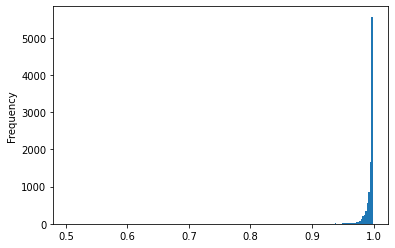

In [211]:
trade_news[trade_news['sentiment_common2'] == 'POSITIVE']['score2'].plot.hist(bins= 200) #0.98

In [ ]:
# try to tuning with  sentiment only 

Accuracy Score : 0.46408839779005523


/tmp/ipykernel_907487/2174507993.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['final_sentiment'] =  trade_news_test_trades.apply(lambda x : final(x) , axis = 1)
/tmp/ipykernel_907487/2174507993.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['final_sentiment_score'] = trade_news_test_trades['final_sentiment']


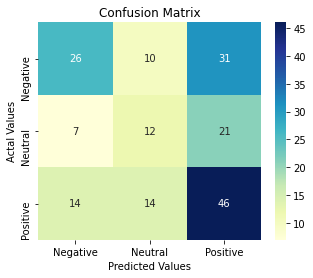

In [97]:
# def final(data) : 
#     if data['sentiment_common'] == 'neutral' :
#         if data['sentiment_common2'] == 'POSITIVE'  and data['score2'] >= 0.99625 :  #0.99
#             return 'POS'
#         elif data['sentiment_common2'] == 'POSITIVE'  and data['score2']< 0.99625 : 
#             return 'NEU'
        
#         elif data['sentiment_common2'] == 'NEGATIVE'  and data['score2'] > 0.987:
#             return 'NEG'
#         elif data['sentiment_common2'] == 'NEGATIVE'  and data['score2'] <=0.987:
#             return 'NEU'
#     else : 
#             return  data['sentiment_common']
from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
def final_score(data) : 
        if data['sentiment_common2'] == 'POSITIVE'  and data['score2'] >= 0.9962 :  #0.9962
            return 'POS'
        elif data['sentiment_common2'] == 'POSITIVE'  and data['score2']< 0.9962 : 
            return 'NEU'
        
        elif data['sentiment_common2'] == 'NEGATIVE'  and data['score2'] > 0.982:
            return 'NEG'
        elif data['sentiment_common2'] == 'NEGATIVE'  and data['score2'] <=0.982:
            return 'NEU'


trade_news_test_trades['final_sentiment'] =  trade_news_test_trades.apply(lambda x : final_score(x) , axis = 1)
trade_news_test_trades['final_sentiment_score'] = trade_news_test_trades['final_sentiment']

trade_news_test_trades['final_sentiment_score'].replace('positive',1,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('POS',1,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('NEU',0,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('NEG',-1,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('negative',-1,inplace=True)

trade_news_test_trades['final_sentiment_score'].value_counts()
#print(trade_news_test_trades.columns)
y_expect_sentiment =trade_news_test_trades['Result (Sentiment)']
y_predict_sentiment = trade_news_test_trades['final_sentiment_score']

# evaluated with baseline performance 
cm = confusion_matrix(y_expect_sentiment, y_predict_sentiment)
accuracy = accuracy_score(y_expect_sentiment, y_predict_sentiment)
print('Accuracy Score :',accuracy)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])
cm_df        

import seaborn as sns
import matplotlib.pyplot as plt
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [104]:
trade_news_test_trades.columns

Index(['Unnamed: 0', 'No.', 'new_id', 'Y/N', 'Sentiment', 'Title', 'Content',
       'Publisher', 'Published_date', 'Source_url', 'Trade_AI_url',
       'ข่าวเกี่ยวหรือไม่เกี่ยว', 'ลักษณะของผลกระทบต่อไทย', 'Remark',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.1', 'ลักษณะของผลกระทบต่อไทย.1', 'Remark.1',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.2', 'ลักษณะของผลกระทบต่อไทย.2', 'Remark.2',
       'Check', 'Check.1', 'Result (Y/N)', 'Result (Sentiment)',
       'clean_content_prep_clean', 'clean_content_ner_prep_clean',
       'sentiment_common2', 'score2', 'final_sentiment',
       'final_sentiment_score', '2_class_final', '2_class_actual'],
      dtype='object')

In [67]:
trade_news_test_trades['sentiment_common'].replace('positive',1, inplace=True) 
trade_news_test_trades['sentiment_common'].replace('neutral',0, inplace=True) 
trade_news_test_trades['sentiment_common'].replace('negative',-1, inplace=True) 


y_expect_sentiment_finance =trade_news_test_trades['Result (Sentiment)']
y_predict_sentiment_finance = trade_news_test_trades['sentiment_common']




# evaluated with baseline performance 
cm = confusion_matrix(y_expect_sentiment_finance, y_predict_sentiment_finance)
accuracy = accuracy_score(y_expect_sentiment_finance, y_predict_sentiment_finance)
print('Accuracy Score :',accuracy)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])
cm_df        

import seaborn as sns
import matplotlib.pyplot as plt
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


KeyError: 'sentiment_common'

In [388]:
print('Accuracy Score :',accuracy)

Accuracy Score : 0.4585635359116022


In [98]:
## Try to predict with  2 class positive and negative 
trade_news_test_trades['2_class_final'] = trade_news_test_trades['final_sentiment_score'].progress_apply(lambda x: \
                                                                                                        -1 if x== -1 else 1)
trade_news_test_trades['2_class_actual'] = trade_news_test_trades['Result (Sentiment)'].progress_apply(lambda x: \
                                                                                                        -1 if x== -1 else 1)

  0%|          | 0/181 [00:00<?, ?it/s]

/tmp/ipykernel_907487/614866913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['2_class_final'] = trade_news_test_trades['final_sentiment_score'].progress_apply(lambda x: \


  0%|          | 0/181 [00:00<?, ?it/s]

/tmp/ipykernel_907487/614866913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['2_class_actual'] = trade_news_test_trades['Result (Sentiment)'].progress_apply(lambda x: \


In [99]:
y_actual_2 = trade_news_test_trades['2_class_actual']
y_pred_2 = trade_news_test_trades['2_class_final']


In [100]:
tn, fp, fn, tp  = confusion_matrix(y_actual_2, y_pred_2).ravel()
accuracy = accuracy_score(y_actual_2, y_pred_2)
accuracy

0.6574585635359116

In [101]:
report_test = classification_report(y_pred_2, y_actual_2)
print('test set')
print(report_test) 

test set
              precision    recall  f1-score   support

          -1       0.39      0.55      0.46        47
           1       0.82      0.69      0.75       134

    accuracy                           0.66       181
   macro avg       0.60      0.62      0.60       181
weighted avg       0.70      0.66      0.67       181



In [58]:
from sklearn.metrics import plot_confusion_matrix
tn, fp, fn, tp  = confusion_matrix(y_actual_2, y_pred_2).ravel()
print('True-negative:',tn , ' False-positive:',fp, '\nFalse-negative:',fn, ' True-positive: ',tp)  ##  fp predict  use to not -use 
cm = confusion_matrix(y_actual_2, y_pred_2)
cm
#plt.imshow(cm, cmap='binary')
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'YlGn');  #YlGn
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Nagative', 'Positive'])
ax.yaxis.set_ticklabels(['Nagative', 'Positive'])

NameError: name 'confusion_matrix' is not defined

In [364]:
trade_news['final_sentiment'] =  trade_news.apply(lambda x : final(x) , axis = 1)

In [264]:
## test sentiemtn news  w


0      1
2      0
3     -1
4      1
5      1
      ..
290    0
292    0
293   -1
295   -1
296    1
Name: Result (Sentiment), Length: 181, dtype: int64

In [106]:

trade_news_test_trades['sentiment_common'], trade_news_test_trades['prob_score'] = zip(*trade_news_test_trades['clean_content_ner_prep_clean'].progress_apply(sentiment))


  0%|          | 0/181 [00:00<?, ?it/s]

/tmp/ipykernel_820702/3022561192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['sentiment_common'], trade_news_test_trades['prob_score'] = zip(*trade_news_test_trades['clean_content_ner_prep_clean'].progress_apply(sentiment))


In [1]:
trade_news_test_trades['Content'][2]

NameError: name 'trade_news_test_trades' is not defined

In [54]:
trade_news_test_trades['sentiment_common2'], trade_news_test_trades['score2'] = zip(*trade_news_test_trades['clean_content_ner_prep_clean'].progress_apply(sentiment_2class))

                                                          

  0%|          | 0/181 [00:00<?, ?it/s]

/tmp/ipykernel_907487/3156572421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['sentiment_common2'], trade_news_test_trades['score2'] = zip(*trade_news_test_trades['clean_content_ner_prep_clean'].progress_apply(sentiment_2class))


In [65]:
trade_news_test_trades

,Unnamed: 0,No.,new_id,Y/N,Sentiment,Title,Content,Publisher,Published_date,Source_url,...,Check,Check.1,Result (Y/N),Result (Sentiment),clean_content_prep_clean,clean_content_ner_prep_clean,sentiment_common2,score2,final_sentiment,final_sentiment_score
0,0,1,2ae6f44fb0d6d29036a13198b55eac3b,y,+,Enough agri waste in Asia to produce natural f...,Enough agri waste Asia produce natural fibres ...,Fibre2Fashion,2021-07-07 00:00:00.000,https://www.fibre2fashion.com/news/sustainabil...,...,3,3,เกี่ยว,1,Enough agri waste Asia produce natural fibres ...,enough agri waste produce natural fibres scale...,POSITIVE,0.998676,POS,1
2,2,3,35411ef10c9c3dd84e4b21beaee10c6c,y,+,Indian startups raise $12 billion till June,Indian startups raise billion till June Mumbai...,The Times of India,2021-07-07 00:30:00.000,https://economictimes.indiatimes.com/tech/star...,...,1,0,เกี่ยว,0,Indian startups raise billion till June Indian...,startups raise billion till startups raise bil...,POSITIVE,0.998580,POS,1
3,3,4,d1d2823e495c1a630a75cb436bce9f1c,y,+,Analysis: China's farmers dump other crops for...,Analysis China farmers dump crops corn bumper ...,Reuters,2021-07-07 01:43:00.000,https://www.reuters.com/world/china/chinas-far...,...,3,-1,เกี่ยว,-1,Analysis China farmers dump crops corn bumper ...,analysis farmers dump crops corn bumper profit...,NEGATIVE,0.984271,NEU,0
4,4,5,35f5a21087643fa4af6511b755b24e29,y,-,"Asia shares stumble, bonds and dollar find saf...",Asia shares stumble bonds dollar find safe dem...,Reuters,2021-07-07 02:33:31.000,https://www.reuters.com/article/us-global-mark...,...,0,1,สรุปไม่ได้,1,Asia shares stumble bonds dollar find safe dem...,shares stumble bonds dollar find safe demand u...,POSITIVE,0.989179,NEU,0
5,5,6,71cae907684beb9be76051eda7c10b91,y,-,"Asia shares stumble, bonds and dollar find saf...",Asia shares stumble bonds dollar find safe dem...,The Times of India,2021-07-07 02:37:11.000,https://economictimes.indiatimes.com/markets/s...,...,0,1,สรุปไม่ได้,1,Asia shares stumble bonds dollar find safe dem...,shares stumble bonds dollar find safe demand s...,NEGATIVE,0.987579,NEG,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,290,291,acfc2965446edb21e57b3781922c1449,y,-,US ginger prices drop due to plentiful supply ...,The Mintec average November 2021 market price ...,FreshPlaza,12/15/2021,https://www.freshplaza.com/article/9383427/us-...,...,3,0,เกี่ยว,0,US ginger prices drop due plentiful supply Chi...,ginger prices drop due plentiful supply the av...,NEGATIVE,0.997840,NEG,-1
292,292,293,0a80064bb0ac68c1aa5d171960a264c3,y,-,U.S. Senators urge USDA to reverse 'harmful' d...,"U.S. Senators Marco Rubio, Ted Cruz and Rick S...",Fresh Fruit Portal,12/16/2021,https://www.freshfruitportal.com/news/2021/12/...,...,2,0,เกี่ยว,0,U S Senators urge USDA reverse harmful decisio...,senators urge reverse harmful decision affecti...,NEGATIVE,0.962364,NEU,0
293,293,294,68f6c23d676edf09632e126043d4d58a,y,+,India: Mango and pomegranate exports to US to ...,"This weekend, the Indian federal government st...",FreshPlaza,1/10/2022,https://www.freshplaza.com/article/9388897/ind...,...,3,-3,เกี่ยว,-1,India Mango pomegranate exports US start Jan F...,mango pomegranate exports start jan feb federa...,POSITIVE,0.997905,POS,1
295,295,296,0dead617e4d9662c6f35ff70a049366d,y,-,Slight drop off in Australian mango numbers bu...,"More than 159,000 trays of mangoes were produc...",FreshPlaza,1/5/2022,https://www.freshplaza.com/article/9387596/sli...,...,3,-1,เกี่ยว,-1,Slight drop Australian mango numbers still ple...,slight drop mango numbers still plenty fruit s...,POSITIVE,0.997550,POS,1


/tmp/ipykernel_820702/2152362813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['final_sentiment'] =  trade_news_test_trades.apply(lambda x : final(x) , axis = 1)
/tmp/ipykernel_820702/2152362813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test_trades['final_sentiment_score'] = trade_news_test_trades['final_sentiment']


In [220]:

trade_news_test_trades['final_sentiment'] =  trade_news_test_trades.apply(lambda x : final(x) , axis = 1)
trade_news_test_trades['final_sentiment_score'] = trade_news_test_trades['final_sentiment']

trade_news_test_trades['final_sentiment_score'].replace('positive',1,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('POS',1,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('NEU',0,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('NEG',-1,inplace=True)
trade_news_test_trades['final_sentiment_score'].replace('negative',-1,inplace=True)

trade_news_test_trades['final_sentiment_score'].value_counts()
#print(trade_news_test_trades.columns)
y_expect_sentiment =trade_news_test_trades['Result (Sentiment)']
y_predict_sentiment = trade_news_test_trades['final_sentiment_score']

# evaluated with baseline performance 
cm = confusion_matrix(y_expect_sentiment, y_predict_sentiment)
accuracy = accuracy_score(y_expect_sentiment, y_predict_sentiment)
print(accuracy)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])
cm_df

0.3314917127071823


/home/nick/envDITP/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Negative,Neutral,Positive
Negative,5,42,20
Neutral,1,29,10
Positive,1,47,26


In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adagrad
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.initializers import Constant

# Performance metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
# len(y_expect_sentiment)

array([11,  9, 54])

In [150]:
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])
cm_df

,Negative,Neutral,Positive
Negative,20,7,40
Neutral,5,7,28
Positive,11,9,54


In [7]:
trade_news.groupby('final_sentiment').count()['score2'].reset_index()

,final_sentiment,score2
0,NEG,4622
1,NEU,2799
2,POS,8453
3,negative,320
4,positive,3183


<AxesSubplot:ylabel='Frequency'>

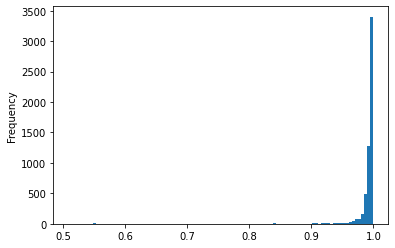

In [8]:
trade_news[trade_news['sentiment_common2'] == 'NEGATIVE']['score2'].plot.hist(bins=100) # 0.98

## Extract Location 


In [17]:
# drop dupplicated location 
country_all.drop_duplicates(subset=['keyword','country'],keep='first',  inplace=True)
country_all.dropna(subset=['country'], inplace=True)
country_all.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [18]:
from spacy import displacy
from collections import Counter
try :
     nlp1
except:
     nlp1 = spacy.load('en_core_web_sm') #DATE , LANGUAGE  PERCENT , NORP ,CARDINAL,GPE,MONEY ,Non-GPE,LOC ,LANGUAGE 
exclude_ner = [ "GPE" ,"LOC"]

get_standard_name= dict(zip(country_all['keyword'], zip(country_all['country'],country_all['iso3']) ) )
##get_standard_name.get('UK')    #America

def ner_process(sentens_string) :
    doc1 = nlp1(sentens_string) 
    #print(nlp1(sentens_string))
    sentenss = []
    for sr in  doc1.ents :
        if sr.label_ in exclude_ner :
             sentenss.append((sr.text,sr.label_))
    sentenss_count = Counter(sentenss)  
    sentenss_count = dict(sentenss_count)
    
    map_country = [ get_standard_name.get(key[0]) for key,value in  sentenss_count.items()  if get_standard_name.get(key[0]) != None] 
    
    return sentenss_count ,map_country         
 
#x =  ner_process(df_th.loc[1,'job_description'])

In [19]:
trade_news.columns

Index(['published_at', 'title', 'description', 'content', 'url',
       'url_to_image', 'tags', 'id', 'original_path', 'publisher',
       'clean_content_prep_clean', 'clean_content_ner_prep_clean',
       'relevance_trade', 'clean_content_ner_prep_clean_511',
       'sentiment_common', 'prob_score', 'sentiment_common2', 'score2',
       'final_sentiment'],
      dtype='object')

In [20]:
trade_news['loction_count'],trade_news['country_extraction']  = zip(*trade_news['content'].progress_apply(ner_process))

  0%|          | 0/19377 [00:00<?, ?it/s]

/home/nick/envDITP/lib/python3.8/site-packages/pandas/core/common.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [63]:
trade_news

,published_at,title,description,content,url,url_to_image,tags,id,original_path,publisher,...,clean_content_ner_prep_clean_511,sentiment_common,prob_score,sentiment_common2,score2,final_sentiment,loction_count,country_extraction,product_word,product_word_map_product_group
0,2021-03-07 00:00:00.000,Crude prices achieve budget-balancing levels f...,NaN,(Bloomberg) --Brent crude now trades above fis...,https://www.worldoil.com/news/2021/3/5/crude-p...,NaN,NaN,f437fb5f4170ab4e40c1c5ae029dfea8,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,crude prices achieve budget balancing levels e...,positive,0.911365,-,-1.000000,positive,"{('the Middle East', 'LOC'): 1, ('Saudi Arabia...","[(Saudi Arabia, SAU)]","[gold, oil, rice, rices]","[(gold, gemstone and jewelry), (oil, น้ำมันปาล..."
1,2021-03-07 00:00:00.000,‘It was an incredibly difficult book to write’...,"Everything that I was feeling – the pain, the ...",Imbolo Mbue has been working on her latest nov...,https://www.independent.co.uk/arts-entertainme...,https://static.independent.co.uk/2021/03/02/15...,NaN,4bf5df3f0e6871ea494282c2a0281dd3,wasbs://raw-data@stditp.blob.core.windows.net/...,Independent,...,‘ it incredibly difficult book write working l...,neutral,0.980492,POSITIVE,0.998525,POS,"{('US', 'GPE'): 3, ('Flint', 'GPE'): 1, ('Mich...","[(United States, USA), (United States, USA), (...","[oil, rice]","[(oil, น้ำมันปาล์ม), (rice, rice)]"
2,2021-03-07 00:00:00.000,Oil prices vault towards $70 as the OPEC-fuele...,NaN,(Bloomberg) - Oil rallied toward $70 a barrel ...,https://www.worldoil.com/news/2021/3/5/oil-pri...,NaN,NaN,d5e7973039982ced652fbb015fbc99a9,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,oil prices vault towards fueled crude rally co...,positive,0.933114,-,-1.000000,positive,"{('Asia', 'LOC'): 2, ('Saudi Arabia', 'GPE'): ...","[(Saudi Arabia, SAU), (Saudi Arabia, SAU), (Un...","[diesel, gold, oil, rice, rices, ring]","[(diesel, สินค้าชิ้นส่วนยานยนต์และอุปกรณ์), (g..."
3,2021-03-07 00:00:00.000,Saudi Arabia takes steps to lead the $700B glo...,NaN,DUBAI (Bloomberg) --Sun-scorched expanses and ...,https://www.worldoil.com/news/2021/3/5/saudi-a...,NaN,NaN,fdccbea4afa9477e908181c67b3a7735,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,takes steps lead b global hydrogen market scor...,neutral,0.920979,POSITIVE,0.998136,POS,"{('DUBAI', 'GPE'): 1, ('Red Sea', 'LOC'): 1, (...","[(Saudi Arabia, SAU), (Taiwan, TWN), (Australi...","[base, brace, capacity, corn, dust, food, form...","[(base, gemstone and jewelry), (brace, textile..."
4,2021-03-07 00:00:01.000,21 Dangerous TikTok Trends Every Parent Should...,Overdosing on allergy medication and starting ...,"Some people will do anything to go viral, from...",https://www.newsweek.com/21-dangerous-tiktok-t...,https://d.newsweek.com/en/full/1750177/tiktok-...,NaN,0322039bb366b9941476888ac15a1ef9,wasbs://raw-data@stditp.blob.core.windows.net/...,Newsweek,...,dangerous tiktok trends every parent should be...,neutral,0.980523,NEGATIVE,0.996056,NEG,"{('Italy', 'GPE'): 1}","[(Italy, ITA)]","[acid, bodies, care, cars, corn, food, form, h...","[(acid, ผลไม้กระป๋องและแปรรูป), (bodies, สินค้..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19372,2022-03-04 13:00:00.000,Europe Returns to South Africa for Coal After ...,Europe Returns to South Africa for Coal After ...,"Paul Burkhardt and Julian Lee\nFri, March 4, 2...",https://finance.yahoo.com/news/europe-returns-...,NaN,NaN,77ed7cd644f8aa08f8b2d444f22b1079,wasbs://raw-data@tradeprodstditp.blob.core.win...,Yahoo Finance,...,after sanctions julian leenfri · min readnn su...,neutral,0.887254,POSITIVE,0.994893,POS,"{('Europe', 'LOC'): 3, ('Asia.\n\nThere', 'GPE...","[(Russia, RUS), (United States, USA), (Colombi...","[food, rice, rices, ring, shell, tons]","[(food, food preparations ), (rice, rice), (ri..."
19373,2022-03-04 19:50:00.000,Global Food Prices Reach All-Time High in Febr...,Global Food Pr

In [229]:
trade_news.to_csv('trad_news_extraction_country.csv', index=False)

## Product Extraction 

In [21]:
# drop duplicated value 

relate_product.drop_duplicates(subset=['keyword','product'], inplace=True)

In [22]:
relate_product.dropna(inplace=True)

In [23]:
# drop common word keys 
common_list = ['articles','goods','kind','use','parts','goods','pipes','preparations','purpose','shapes','use','cuts','cc','mm','shock','bs']
relate_product = relate_product[~relate_product['keyword'].isin(common_list)]

In [24]:
# check len string 
relate_product['keyword_len_string'] =relate_product['keyword'].str.len()
relate_product = relate_product[(relate_product['keyword_len_string'] >3) | (relate_product['keyword']=='oil')]

In [25]:
product_mapping.get('GABA rice')

NameError: name 'product_mapping' is not defined

In [26]:
relate_product_group =relate_product.groupby('keyword')['product'].apply(lambda x: '|'.join(x)).reset_index()

In [27]:
relate_product_group['len_product'] = relate_product_group['product'].apply(lambda x : len(x.split('|')))

In [28]:
relate_product_group[relate_product_group['len_product'] > 1]

,keyword,product,len_product
286,flour,สิ่งปรุงรสอาหาร|ไม้และผลิตภัณฑ์ไม้,2
297,fruits,fruits|ผลไม้กระป๋องและแปรรูป,2
389,kitchenware,ไม้และผลิตภัณฑ์ไม้|ผลิตภัณฑ์พลาสติก,2
441,mitts,rubber products|เครื่องนุ่งห่ม,2
512,plastics,รองเท้าและชิ้นส่วน|ผลิตภัณฑ์พลาสติก,2
581,rubber,rubber products|รองเท้าและชิ้นส่วน|natural rubber,3
680,swimwear,textile & garments|เครื่องนุ่งห่ม,2
682,tableware,ไม้และผลิตภัณฑ์ไม้|ผลิตภัณฑ์พลาสติก,2


In [29]:
relate_product_group[relate_product_group['keyword'] == 'nes']

,keyword,product,len_product


In [30]:
relate_product_group

,keyword,product,len_product
0,A1 Extra Super,rice,1
1,A1 super,rice,1
2,Basmati,rice,1
3,Chinese lacquer,herb,1
4,GABA rice,rice,1
...,...,...,...
745,yarrow oil,cosmetic perfumery and soaps,1
746,yarrow oils,cosmetic perfumery and soaps,1
747,yuca,cassava,1
748,yucas,cassava,1


In [31]:
def map_product(contence, df_map =relate_product_group ) :
    wpt = nltk.WordPunctTokenizer()
    token =  wpt.tokenize(contence.lower())
    lower_contence = contence.lower()
    key_product =  relate_product_group['keyword'].to_list()
    list_product = []
    for key in key_product : 
        if len(key.split(' ')) > 1 and (key in lower_contence) : 
                list_product.append(key)
            
        elif  len(key.split(' ')) == 1   :
            if key in lower_contence :
                list_product.append(key) 
                
    # created dict  mapping  

    product_mapping =  dict(zip(relate_product_group['keyword'],relate_product_group['product']))            
    
    map_product_group = [ (i,product_mapping.get(i)) for i in list_product]
    
    
#             product_token = list(filter( lambda r :  r in  key_product , token))
#             print()
#             list_product.extend(product_token)
    return   list_product    , map_product_group 

In [32]:
map_product(trade_news['clean_content_prep_clean'][30])

(['load', 'oil', 'ring'],
 [('load', 'ไม้และผลิตภัณฑ์ไม้'),
  ('oil', 'น้ำมันปาล์ม'),
  ('ring', 'gemstone and jewelry')])

In [35]:
trade_news['product_word'],trade_news['product_word_map_product_group'] = zip(*trade_news['clean_content_prep_clean'].progress_apply(map_product))

  0%|          | 0/19377 [00:00<?, ?it/s]

/home/nick/envDITP/lib/python3.8/site-packages/pandas/core/common.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [36]:
trade_news

,published_at,title,description,content,url,url_to_image,tags,id,original_path,publisher,...,clean_content_ner_prep_clean_511,sentiment_common,prob_score,sentiment_common2,score2,final_sentiment,loction_count,country_extraction,product_word,product_word_map_product_group
0,2021-03-07 00:00:00.000,Crude prices achieve budget-balancing levels f...,NaN,(Bloomberg) --Brent crude now trades above fis...,https://www.worldoil.com/news/2021/3/5/crude-p...,NaN,NaN,f437fb5f4170ab4e40c1c5ae029dfea8,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,crude prices achieve budget balancing levels e...,positive,0.911365,-,-1.000000,positive,"{('the Middle East', 'LOC'): 1, ('Saudi Arabia...","[(Saudi Arabia, SAU)]","[gold, oil, rice, rices]","[(gold, gemstone and jewelry), (oil, น้ำมันปาล..."
1,2021-03-07 00:00:00.000,‘It was an incredibly difficult book to write’...,"Everything that I was feeling – the pain, the ...",Imbolo Mbue has been working on her latest nov...,https://www.independent.co.uk/arts-entertainme...,https://static.independent.co.uk/2021/03/02/15...,NaN,4bf5df3f0e6871ea494282c2a0281dd3,wasbs://raw-data@stditp.blob.core.windows.net/...,Independent,...,‘ it incredibly difficult book write working l...,neutral,0.980492,POSITIVE,0.998525,POS,"{('US', 'GPE'): 3, ('Flint', 'GPE'): 1, ('Mich...","[(United States, USA), (United States, USA), (...","[oil, rice]","[(oil, น้ำมันปาล์ม), (rice, rice)]"
2,2021-03-07 00:00:00.000,Oil prices vault towards $70 as the OPEC-fuele...,NaN,(Bloomberg) - Oil rallied toward $70 a barrel ...,https://www.worldoil.com/news/2021/3/5/oil-pri...,NaN,NaN,d5e7973039982ced652fbb015fbc99a9,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,oil prices vault towards fueled crude rally co...,positive,0.933114,-,-1.000000,positive,"{('Asia', 'LOC'): 2, ('Saudi Arabia', 'GPE'): ...","[(Saudi Arabia, SAU), (Saudi Arabia, SAU), (Un...","[diesel, gold, oil, rice, rices, ring]","[(diesel, สินค้าชิ้นส่วนยานยนต์และอุปกรณ์), (g..."
3,2021-03-07 00:00:00.000,Saudi Arabia takes steps to lead the $700B glo...,NaN,DUBAI (Bloomberg) --Sun-scorched expanses and ...,https://www.worldoil.com/news/2021/3/5/saudi-a...,NaN,NaN,fdccbea4afa9477e908181c67b3a7735,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,takes steps lead b global hydrogen market scor...,neutral,0.920979,POSITIVE,0.998136,POS,"{('DUBAI', 'GPE'): 1, ('Red Sea', 'LOC'): 1, (...","[(Saudi Arabia, SAU), (Taiwan, TWN), (Australi...","[base, brace, capacity, corn, dust, food, form...","[(base, gemstone and jewelry), (brace, textile..."
4,2021-03-07 00:00:01.000,21 Dangerous TikTok Trends Every Parent Should...,Overdosing on allergy medication and starting ...,"Some people will do anything to go viral, from...",https://www.newsweek.com/21-dangerous-tiktok-t...,https://d.newsweek.com/en/full/1750177/tiktok-...,NaN,0322039bb366b9941476888ac15a1ef9,wasbs://raw-data@stditp.blob.core.windows.net/...,Newsweek,...,dangerous tiktok trends every parent should be...,neutral,0.980523,NEGATIVE,0.996056,NEG,"{('Italy', 'GPE'): 1}","[(Italy, ITA)]","[acid, bodies, care, cars, corn, food, form, h...","[(acid, ผลไม้กระป๋องและแปรรูป), (bodies, สินค้..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19372,2022-03-04 13:00:00.000,Europe Returns to South Africa for Coal After ...,Europe Returns to South Africa for Coal After ...,"Paul Burkhardt and Julian Lee\nFri, March 4, 2...",https://finance.yahoo.com/news/europe-returns-...,NaN,NaN,77ed7cd644f8aa08f8b2d444f22b1079,wasbs://raw-data@tradeprodstditp.blob.core.win...,Yahoo Finance,...,after sanctions julian leenfri · min readnn su...,neutral,0.887254,POSITIVE,0.994893,POS,"{('Europe', 'LOC'): 3, ('Asia.\n\nThere', 'GPE...","[(Russia, RUS), (United States, USA), (Colombi...","[food, rice, rices, ring, shell, tons]","[(food, food preparations ), (rice, rice), (ri..."
19373,2022-03-04 19:50:00.000,Global Food Prices Reach All-Time High in Febr...,Global Food Pr

In [37]:
partner.head()

,product,exporter,importer,value,%TH_Export,%cummul,rank,partner_name
0,Corn,THA,PHL,1.929841e+07,0.298433,0.298433,1.0,Philippines
1,Corn,THA,MMR,1.664991e+07,0.257477,0.555910,2.0,Myanmar
2,Corn,THA,VNM,1.050087e+07,0.162387,0.718297,3.0,Viet Nam
3,Cosmetic Perfumery and Soaps,THA,JPN,4.355512e+08,0.142652,0.142652,1.0,Japan
4,Cosmetic Perfumery and Soaps,THA,PHL,2.807177e+08,0.091941,0.234593,2.0,Philippines


# partner and compatitor

In [38]:
#compatetior
partner_group =  partner.groupby(by=['product','exporter'])['importer'].apply( lambda x : '|'.join(x)).reset_index()
# 


competiors_group = competiors[competiors['competitor_flag'] !='THA' ] \
.groupby(by=['product'])['exporter'] \
.apply( lambda x : '|'.join(x)).reset_index()

In [39]:
trade_news.columns

Index(['published_at', 'title', 'description', 'content', 'url',
       'url_to_image', 'tags', 'id', 'original_path', 'publisher',
       'clean_content_prep_clean', 'clean_content_ner_prep_clean',
       'relevance_trade', 'clean_content_ner_prep_clean_511',
       'sentiment_common', 'prob_score', 'sentiment_common2', 'score2',
       'final_sentiment', 'loction_count', 'country_extraction',
       'product_word', 'product_word_map_product_group'],
      dtype='object')

In [40]:
# created cross join value 

# country datafrane  
list_country = []
for index,i in trade_news.iterrows() :
     for c in i['country_extraction']  :
        list_country.append((index,c[1],c[0]))
## product group  
list_product_group  = []
for index,i in trade_news.iterrows() :
    for p in i['product_word_map_product_group'] :
        list_product_group.append((index,p[1],p[0]))
country_df =  pd.DataFrame(list_country,columns=['news_index','country_iso3','full_name'])
country_df.drop_duplicates(inplace=True)
product_group_df = pd.DataFrame(list_product_group, columns = ['news_index','product_group','product'])
product_group_df.drop_duplicates(subset=['news_index','product_group'],inplace=True,keep = 'first')
df_all = country_df.merge(product_group_df,  left_on='news_index',right_on='news_index')

In [67]:
df_all

,news_index,country_iso3,full_name,product_group,product
0,0,SAU,Saudi Arabia,gemstone and jewelry,gold
1,0,SAU,Saudi Arabia,น้ำมันปาล์ม,oil
2,0,SAU,Saudi Arabia,rice,rice
3,1,USA,United States,น้ำมันปาล์ม,oil
4,1,USA,United States,rice,rice
...,...,...,...,...,...
253989,19376,COL,Colombia,food preparations,food
253990,19376,COL,Colombia,rice,rice
253991,19376,COL,Colombia,gemstone and jewelry,ring
253992,19376,COL,Colombia,eggs,shell


In [42]:
partner

,product,exporter,importer,value,%TH_Export,%cummul,rank,partner_name
0,Corn,THA,PHL,1.929841e+07,0.298433,0.298433,1.0,Philippines
1,Corn,THA,MMR,1.664991e+07,0.257477,0.555910,2.0,Myanmar
2,Corn,THA,VNM,1.050087e+07,0.162387,0.718297,3.0,Viet Nam
3,Cosmetic Perfumery and Soaps,THA,JPN,4.355512e+08,0.142652,0.142652,1.0,Japan
4,Cosmetic Perfumery and Soaps,THA,PHL,2.807177e+08,0.091941,0.234593,2.0,Philippines
...,...,...,...,...,...,...,...,...
174,ไม้และผลิตภัณฑ์ไม้,THA,CHN,1.289919e+09,0.470814,0.470814,1.0,China
175,ไม้และผลิตภัณฑ์ไม้,THA,KOR,2.337952e+08,0.085334,0.556148,2.0,"Korea, Republic of"
176,ไม้และผลิตภัณฑ์ไม้,THA,ARE,2.090273e+08,0.076294,0.632442,3.0,United Arab Emirates
177,ไม้และผลิตภัณฑ์ไม้,THA,SAU,1.730220e+08,0.063152,0.695594,4.0,Saudi Arabia


In [43]:
df_all.shape

(253994, 5)

In [44]:
pd.unique(partner['product'])

array(['Corn', 'Cosmetic Perfumery and Soaps', 'Food Preparations ',
       'Gemstone and Jewelry', 'Herb', 'Medicaments', 'Natural Rubber',
       'Poultry', 'Rice', 'Rubber Products', 'Textile & Garments', 'กุ้ง',
       'น้ำมันปาล์ม', 'ผลิตภัณฑ์พลาสติก', 'ผลไม้กระป๋องและแปรรูป',
       'รองเท้าและชิ้นส่วน', 'สินค้าชิ้นส่วนยานยนต์และอุปกรณ์',
       'สิ่งปรุงรสอาหาร', 'อาหารทะเลกระป๋องและแปรรูป', 'อาหารสัตว์เลี้ยง',
       'เครื่องนุ่งห่ม', 'เฟอร์นิเจอร์และชิ้นส่วน', 'ไก่แปรรูป',
       'ไม้และผลิตภัณฑ์ไม้'], dtype=object)

In [45]:
partner['product_clean'] = partner['product'].str.lower().str.rstrip()
competiors['product_clean'] = competiors['product'].str.lower().str.rstrip()

In [46]:
partner.drop_duplicates(subset=['product_clean','importer'], inplace=True)

In [47]:
competiors.drop_duplicates(subset=['product_clean','exporter'],inplace=True, keep= 'first')

In [48]:
df_all_partner = df_all.merge(partner,  left_on=['country_iso3','product_group'], right_on=['importer','product_clean'], how = 'left')

In [49]:
competiors

,product,exporter,importer,value,mkt,%Share_to_MKT,%cummul,rank,competitor_flag,competitor_name,product_clean
0,Cosmetic Perfumery and Soaps,CHN,AUS,3.575252e+08,"Cosmetic Perfumery and Soaps,AUS",0.364560,0.364560,1.0,Competitor,China,cosmetic perfumery and soaps
1,Cosmetic Perfumery and Soaps,THA,AUS,2.122244e+08,"Cosmetic Perfumery and Soaps,AUS",0.216400,0.580960,2.0,THA,Thailand,cosmetic perfumery and soaps
2,Cosmetic Perfumery and Soaps,SGP,AUS,1.948657e+08,"Cosmetic Perfumery and Soaps,AUS",0.198700,0.779660,3.0,Competitor,Singapore,cosmetic perfumery and soaps
3,Cosmetic Perfumery and Soaps,JPN,CHN,5.803161e+09,"Cosmetic Perfumery and Soaps,CHN",0.288687,0.288687,1.0,Competitor,Japan,cosmetic perfumery and soaps
4,Cosmetic Perfumery and Soaps,KOR,CHN,5.735758e+09,"Cosmetic Perfumery and Soaps,CHN",0.285334,0.574021,2.0,Competitor,"Korea, Republic of",cosmetic perfumery and soaps
...,...,...,...,...,...,...,...,...,...,...,...
265,ไม้และผลิตภัณฑ์ไม้,PNG,CHN,6.068876e+08,"ไม้และผลิตภัณฑ์ไม้,CHN",0.066107,0.687252,4.0,Competitor,Papua New Guinea,ไม้และผลิตภัณฑ์ไม้
266,ไม้และผลิตภัณฑ์ไม้,SLB,CHN,3.351052e+08,"ไม้และผลิตภัณฑ์ไม้,CHN",0.036502,0.723754,5.0,Competitor,Solomon Islands,ไม้และผลิตภัณฑ์ไม้
267,ไม้และผลิตภัณฑ์ไม้,COD,CHN,3.283060e+08,"ไม้และผลิตภัณฑ์ไม้,CHN",0.035761,0.759516,6.0,Competitor,"Congo, The Democratic Republic of the",ไม้และผลิตภัณฑ์ไม้
268,ไม้และผลิตภัณฑ์ไม้,CHL,CHN,2.829951e+08,"ไม้และผลิตภัณฑ์ไม้,CHN",0.030826,0.790342,7.0,Competitor,Chile,ไม้และผลิตภัณฑ์ไม้


In [50]:
df_all_competitor = df_all.merge(competiors[competiors['competitor_flag'] !='THA' ]  \
                                 , right_on= ['exporter','product_clean'] , left_on= ['country_iso3','product_group'] \
                                 , how = 'left')

In [51]:
df_all_competitor.columns

Index(['news_index', 'country_iso3', 'full_name', 'product_group', 'product_x',
       'product_y', 'exporter', 'importer', 'value', 'mkt', '%Share_to_MKT',
       '%cummul', 'rank', 'competitor_flag', 'competitor_name',
       'product_clean'],
      dtype='object')

In [52]:
df_all_competitor = df_all_competitor[['news_index', 'country_iso3','competitor_flag', 'exporter',
       'product_clean']].rename(columns  = {'exporter':'comp_name','product_clean':'product_clean_competitor'})


In [53]:
df_all_competitor

,news_index,country_iso3,competitor_flag,comp_name,product_clean_competitor
0,0,SAU,NaN,NaN,NaN
1,0,SAU,NaN,NaN,NaN
2,0,SAU,NaN,NaN,NaN
3,1,USA,NaN,NaN,NaN
4,1,USA,NaN,NaN,NaN
...,...,...,...,...,...
253989,19376,COL,NaN,NaN,NaN
253990,19376,COL,NaN,NaN,NaN
253991,19376,COL,NaN,NaN,NaN
253992,19376,COL,NaN,NaN,NaN


In [54]:
merge_partner_com =  pd.concat( [df_all_partner, df_all_competitor[['product_clean_competitor','comp_name' ]]],axis=1) 

In [55]:
merge_partner_com

,news_index,country_iso3,full_name,product_group,product_x,product_y,exporter,importer,value,%TH_Export,%cummul,rank,partner_name,product_clean,product_clean_competitor,comp_name
0,0,SAU,Saudi Arabia,gemstone and jewelry,gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,SAU,Saudi Arabia,น้ำมันปาล์ม,oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,SAU,Saudi Arabia,rice,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,USA,United States,น้ำมันปาล์ม,oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,USA,United States,rice,rice,Rice,THA,USA,1.092100e+09,0.180131,0.180131,1.0,United States,rice,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253989,19376,COL,Colombia,food preparations,food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253990,19376,COL,Colombia,rice,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253991,19376,COL,Colombia,gemstone and jewelry,ring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253992,19376,COL,Colombia,eggs,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
filter_com_partner =  merge_partner_com[ ( ~merge_partner_com['exporter'].isnull()) | ( ~merge_partner_com['comp_name'].isnull())]

In [62]:
filter_com_partner

,news_index,country_iso3,full_name,product_group,product_x,product_y,exporter,importer,value,%TH_Export,%cummul,rank,partner_name,product_clean,product_clean_competitor,comp_name
4,1,USA,United States,rice,rice,Rice,THA,USA,1.092100e+09,0.180131,0.180131,1.0,United States,rice,NaN,NaN
8,1,CMR,Cameroon,rice,rice,Rice,THA,CMR,2.573311e+08,0.042444,0.656080,7.0,Cameroon,rice,NaN,NaN
10,1,ZAF,South Africa,rice,rice,Rice,THA,ZAF,7.638499e+08,0.125990,0.435949,3.0,South Africa,rice,NaN,NaN
11,2,SAU,Saudi Arabia,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,diesel,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,THA,SAU,7.904891e+08,0.026792,0.691559,10.0,Saudi Arabia,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,NaN,NaN
15,2,USA,United States,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,diesel,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,THA,USA,2.313159e+09,0.078400,0.352346,3.0,United States,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253975,19375,USA,United States,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,type,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,THA,USA,2.313159e+09,0.078400,0.352346,3.0,United States,สินค้าชิ้นส่วนยานยนต์และอุปกรณ์,NaN,NaN
253977,19375,GBR,United Kingdom,gemstone and jewelry,ring,Gemstone and Jewelry,THA,GBR,3.140682e+08,0.057715,0.623090,4.0,United Kingdom,gemstone and jewelry,NaN,NaN
253985,19376,USA,United States,rice,rice,Rice,THA,USA,1.092100e+09,0.180131,0.180131,1.0,United States,rice,NaN,NaN
253986,19376,USA,United States,gemstone and jewelry,ring,Gemstone and Jewelry,THA,USA,1.628252e+09,0.299215,0.299215,1.0,United States,gemstone and jewelry,NaN,NaN


In [58]:
trade_news

,published_at,title,description,content,url,url_to_image,tags,id,original_path,publisher,...,clean_content_ner_prep_clean_511,sentiment_common,prob_score,sentiment_common2,score2,final_sentiment,loction_count,country_extraction,product_word,product_word_map_product_group
0,2021-03-07 00:00:00.000,Crude prices achieve budget-balancing levels f...,NaN,(Bloomberg) --Brent crude now trades above fis...,https://www.worldoil.com/news/2021/3/5/crude-p...,NaN,NaN,f437fb5f4170ab4e40c1c5ae029dfea8,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,crude prices achieve budget balancing levels e...,positive,0.911365,-,-1.000000,positive,"{('the Middle East', 'LOC'): 1, ('Saudi Arabia...","[(Saudi Arabia, SAU)]","[gold, oil, rice, rices]","[(gold, gemstone and jewelry), (oil, น้ำมันปาล..."
1,2021-03-07 00:00:00.000,‘It was an incredibly difficult book to write’...,"Everything that I was feeling – the pain, the ...",Imbolo Mbue has been working on her latest nov...,https://www.independent.co.uk/arts-entertainme...,https://static.independent.co.uk/2021/03/02/15...,NaN,4bf5df3f0e6871ea494282c2a0281dd3,wasbs://raw-data@stditp.blob.core.windows.net/...,Independent,...,‘ it incredibly difficult book write working l...,neutral,0.980492,POSITIVE,0.998525,POS,"{('US', 'GPE'): 3, ('Flint', 'GPE'): 1, ('Mich...","[(United States, USA), (United States, USA), (...","[oil, rice]","[(oil, น้ำมันปาล์ม), (rice, rice)]"
2,2021-03-07 00:00:00.000,Oil prices vault towards $70 as the OPEC-fuele...,NaN,(Bloomberg) - Oil rallied toward $70 a barrel ...,https://www.worldoil.com/news/2021/3/5/oil-pri...,NaN,NaN,d5e7973039982ced652fbb015fbc99a9,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,oil prices vault towards fueled crude rally co...,positive,0.933114,-,-1.000000,positive,"{('Asia', 'LOC'): 2, ('Saudi Arabia', 'GPE'): ...","[(Saudi Arabia, SAU), (Saudi Arabia, SAU), (Un...","[diesel, gold, oil, rice, rices, ring]","[(diesel, สินค้าชิ้นส่วนยานยนต์และอุปกรณ์), (g..."
3,2021-03-07 00:00:00.000,Saudi Arabia takes steps to lead the $700B glo...,NaN,DUBAI (Bloomberg) --Sun-scorched expanses and ...,https://www.worldoil.com/news/2021/3/5/saudi-a...,NaN,NaN,fdccbea4afa9477e908181c67b3a7735,wasbs://raw-data@stditp.blob.core.windows.net/...,World Oil,...,takes steps lead b global hydrogen market scor...,neutral,0.920979,POSITIVE,0.998136,POS,"{('DUBAI', 'GPE'): 1, ('Red Sea', 'LOC'): 1, (...","[(Saudi Arabia, SAU), (Taiwan, TWN), (Australi...","[base, brace, capacity, corn, dust, food, form...","[(base, gemstone and jewelry), (brace, textile..."
4,2021-03-07 00:00:01.000,21 Dangerous TikTok Trends Every Parent Should...,Overdosing on allergy medication and starting ...,"Some people will do anything to go viral, from...",https://www.newsweek.com/21-dangerous-tiktok-t...,https://d.newsweek.com/en/full/1750177/tiktok-...,NaN,0322039bb366b9941476888ac15a1ef9,wasbs://raw-data@stditp.blob.core.windows.net/...,Newsweek,...,dangerous tiktok trends every parent should be...,neutral,0.980523,NEGATIVE,0.996056,NEG,"{('Italy', 'GPE'): 1}","[(Italy, ITA)]","[acid, bodies, care, cars, corn, food, form, h...","[(acid, ผลไม้กระป๋องและแปรรูป), (bodies, สินค้..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19372,2022-03-04 13:00:00.000,Europe Returns to South Africa for Coal After ...,Europe Returns to South Africa for Coal After ...,"Paul Burkhardt and Julian Lee\nFri, March 4, 2...",https://finance.yahoo.com/news/europe-returns-...,NaN,NaN,77ed7cd644f8aa08f8b2d444f22b1079,wasbs://raw-data@tradeprodstditp.blob.core.win...,Yahoo Finance,...,after sanctions julian leenfri · min readnn su...,neutral,0.887254,POSITIVE,0.994893,POS,"{('Europe', 'LOC'): 3, ('Asia.\n\nThere', 'GPE...","[(Russia, RUS), (United States, USA), (Colombi...","[food, rice, rices, ring, shell, tons]","[(food, food preparations ), (rice, rice), (ri..."
19373,2022-03-04 19:50:00.000,Global Food Prices Reach All-Time High in Febr...,Global Food Pr